# Phase 1: Exploratory Data Analysis (EDA) & Preprocessing

This notebook covers the crucial phase of understanding the data's characteristics, uncovering initial insights, and preparing it for modeling.

### Library Imports
First, we import all the necessary libraries for this phase.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set some display options for better output in the notebook
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set a style for all plots
sns.set_style('whitegrid')

### Step 1: Initial Data Inspection

We load the dataset and perform a high-level overview to understand its structure, size, and content.

In [27]:


df = pd.read_csv('accepted_2007_to_2018Q4.csv.gz', compression='gzip', low_memory=False)
print("Dataset loaded successfully.")


Dataset loaded successfully.


In [28]:
# Use .info() to get a summary of data types and non-null values
if not df.empty:
    print("DataFrame Info:")
    df.info()
    print("Numerical Features Summary:")
    display(df.describe())
    print("First 5 Rows of the Dataset:")
    display(df.head())
    print("Last 5 Rows of the Dataset:")
    display(df.tail())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB
Numerical Features Summary:


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260638e+06,1.102166e+06,359156.000000,2.260639e+06,2.260639e+06,2.260668e+06,2.258866e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260523e+06,580775.000000,2260668.0,1.207100e+05,120706.000000,2.260639e+06,2.190392e+06,2.190392e+06,1.394538e+06,1.394539e+06,1.394539e+06,1.394539e+06,1.350744e+06,1.394539e+06,1.191818e+06,1.394539e+06,1.394539e+06,1.394539e+06,1.394320e+06,2.190392e+06,1.394539e+06,1.394538e+06,1.394538e+06,2.210638e+06,2.190322e+06,2.185733e+06,2.184597e+06,2.260523e+06,2.260639e+06,2.121597e+06,2.190391e+06,2.190391e+06,2.190392e+06,2.210638e+06,2.187256e+06,519701.000000,1.965233e+06,740359.000000,2.190392e+06,2.190392e+06,2.190392e+06,2.202078e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190391e+06,2.190392e+06,2.202078e+06,2.107011e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190237e+06,2.185289e+06,2.259303e+06,2.260563e+06,2.190392e+06,2.210638e+06,2.210638e+06,2.190392e+06,1.080200e+05,108021.000000,108021.000000,108021.000000,108021.000000,108021.000000,106184.000000,108021.000000,108021.000000,108021.000000,108021.000000,35942.000000,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,7.025884e+02,5.768354e-01,3.454092e+01,72.312842,1.161240e+01,1.975278e-01,1.665846e+04,5.033770e+01,2.416255e+01,4.206891e+03,4.205965e+03,1.208256e+04,1.206439e+04,9.505772e+03,2.431388e+03,1.518453e+00,1.438791e+02,2.398257e+01,3.429346e+03,6.876610e+02,6.755397e+02,1.814580e-02,44.164220,1.0,1.236246e+05,19.251817,4.147942e-03,2.327317e+02,1.424922e+05,9.344199e-01,2.779407e+00,6.764314e-01,1.562752e+00,2.122236e+01,3.550665e+04,6.914098e+01,1.290133e+00,2.749923e+00,5.806393e+03,5.703230e+01,3.457394e+04,1.012867e+00,1.47

First 5 Rows of the Dataset:


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

Last 5 Rows of the Dataset:


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
2260696,88985880,NaN,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,Vice President,9 years,MORTGAGE,227000.0,Verified,Oct-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,NaN,907xx,CA,12.75,7.0,Feb-1995,705.0,709.0,1.0,9.0,NaN,5.0,0.0,8633.0,64.9,37.0,f,23252.59,23252.59,24903.93,24903.93,16747.41,8156.52,0.00,0.0,0.0,Mar-2019,859.56,Apr-2019,Mar-2019,724.0,720.0,0.0,10.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,28398.0,0.0,2.0,0.0,1.0,15.0,19765.0,46.0,0.0,0.0,5141.0,51.0,13300.0,3.0,0.0,2.0,2.0,5680.0,4070.0,66.9,0.0,0.0,154.0,258.0,33.0,15.0,3.0,41.0,9.0,1.0,9.0,6.0,2.0,3.0,2.0,15.0,9.0,3.0,23.0,3.0,5.0,0.0,0.0,7.0,0.0,75.7,50.0,0.0,0.0,55970.0,28398.0,12300.0,42670.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260697,88224441,NaN,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,Program Manager,6 years,RENT,110000.0,Not Verified,Oct-2016,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,334xx,FL,18.30,0.0,Jul-1999,660.0,664.0,0.0,67.0,72.0,10.0,1.0,17641.0,68.1,31.0,f,0.00,0.00,6755.40,6755.40,3521.91,3233.49,0.00,0.0,0.0,Oct-2017,564.56,NaN,Mar-2019,594.0,590.0,0.0,67.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,62426.0,0.0,2.0,0.0,2.0,20.0,44785.0,78.0,1.0,5.0,6172.0,73.0,25900.0,0.0,0.0,1.0,7.0,6243.0,4660.0,77.5,0.0,0.0,132.0,206.0,9.0,9.0,2.0,9.0,NaN,9.0,NaN,1.0,5.0,7.0,5.0,15.0,4.0,8.0,24.0,7.0,10.0,0.0,0.0,0.0,1.0,96.2,40.0,1.0,0.0,84664.0,62426.0,20700.0,58

### Step 2: Target Variable Analysis

Here, we define our prediction target (`default` vs. `fully paid`) and examine its distribution to understand the class imbalance.

Analyzing the target variable: 'loan_status'
Original loan status values:
loan_status
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: count, dtype: int64
--------------------------------------------------
Created binary target variable 'loan_status':
loan_status
0    1076751
1     268559
Name: count, dtype: int64
--------------------------------------------------


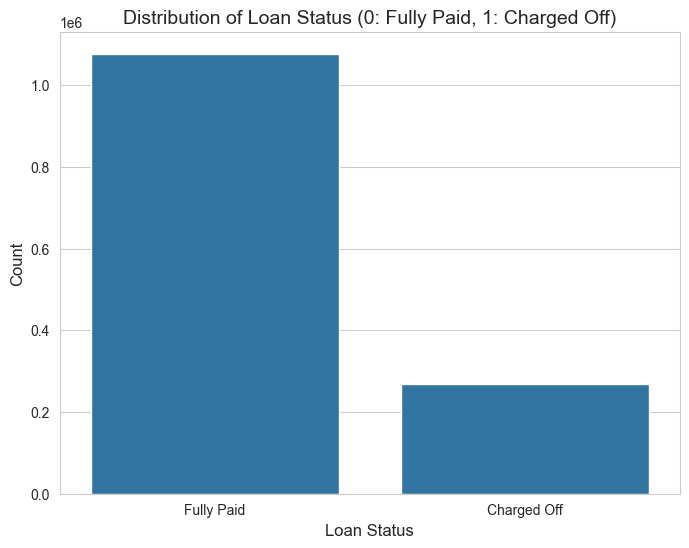

The plot clearly shows a significant class imbalance.


In [29]:
if not df.empty:
    print("Analyzing the target variable: 'loan_status'")

    # We are interested in loans that are 'Fully Paid' or 'Charged Off' (defaulted).
    print("Original loan status values:")
    print(df['loan_status'].value_counts())
    print("-"*50)

    # Filter the DataFrame to only include these two outcomes
    df = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])].copy()

    # Create the binary target variable: 1 for 'Charged Off' and 0 for 'Fully Paid'
    df['loan_status'] = df['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

    print("Created binary target variable 'loan_status':")
    print(df['loan_status'].value_counts())
    print("-"*50)


    # Visualize the distribution of the target variable
    plt.figure(figsize=(8, 6))
    sns.countplot(x='loan_status', data=df)
    plt.title('Distribution of Loan Status (0: Fully Paid, 1: Charged Off)', fontsize=14)
    plt.xlabel('Loan Status', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks([0, 1], ['Fully Paid', 'Charged Off'])
    plt.show()

    print("The plot clearly shows a significant class imbalance.")

### Step 3: Univariate Analysis

We analyze individual features to understand their distributions and identify potential outliers.

Distributions of Key Numerical Features


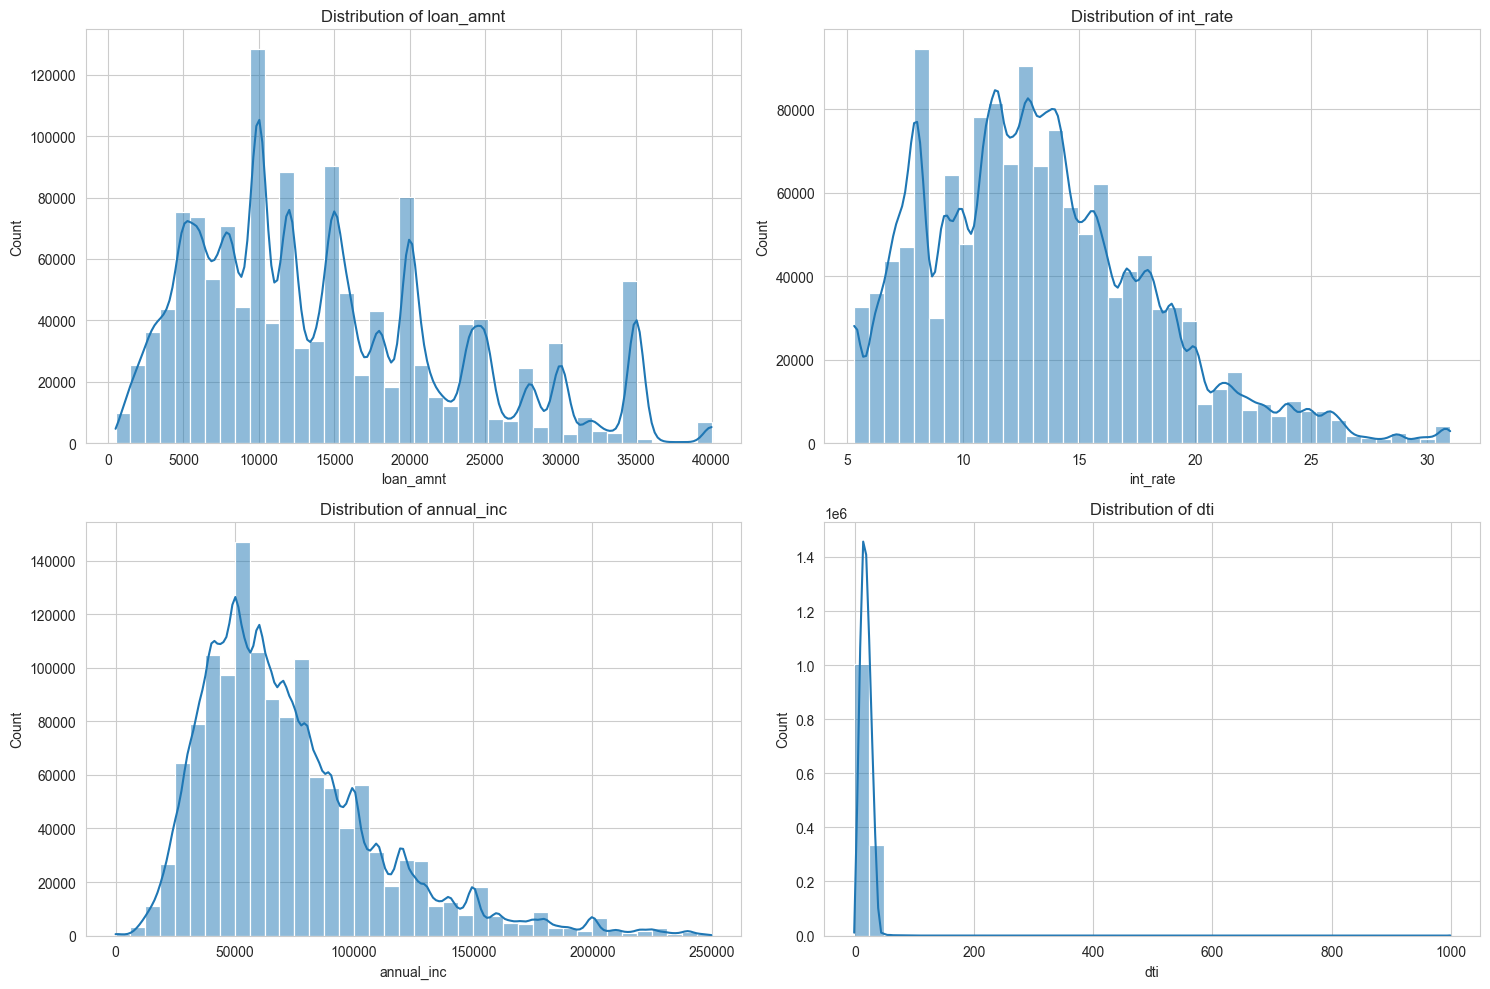

In [30]:
if not df.empty:
    # Define key numerical and categorical features for analysis
    key_numerical_features = ['loan_amnt', 'int_rate', 'annual_inc', 'dti']
    key_categorical_features = ['grade', 'sub_grade', 'home_ownership', 'purpose']

    # Plot distributions for key numerical features
    print("Distributions of Key Numerical Features")
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(key_numerical_features):
        plt.subplot(2, 2, i + 1)
        # Remove outliers in annual_inc for better visualization
        data_to_plot = df[col].dropna()
        if col == 'annual_inc':
            data_to_plot = data_to_plot[data_to_plot < data_to_plot.quantile(0.99)]
        sns.histplot(data_to_plot, kde=True, bins=40)
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()


Distributions of Key Categorical Features


/var/folders/tc/g95c1wy50xgd_vz2h9hyjl_h0000gn/T/ipykernel_72091/1439207217.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


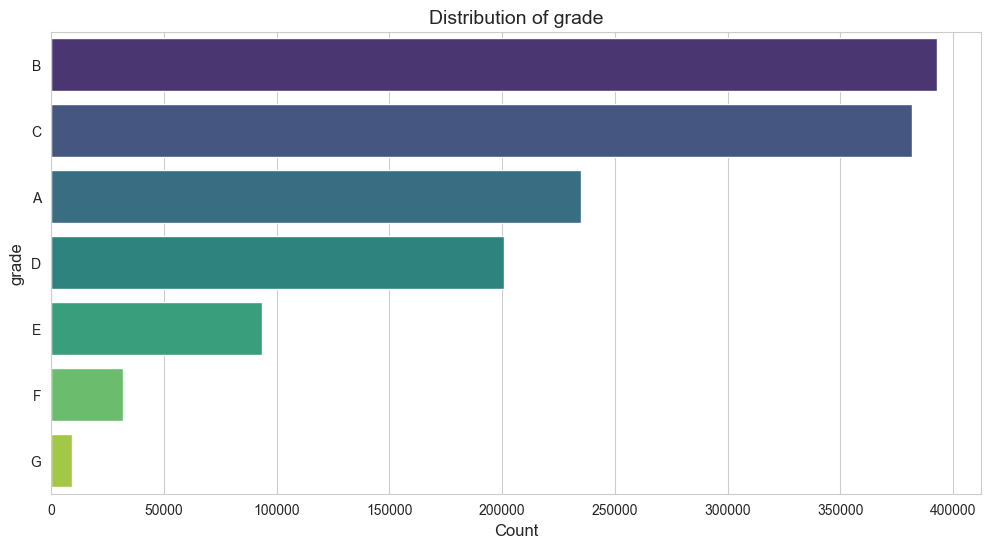

/var/folders/tc/g95c1wy50xgd_vz2h9hyjl_h0000gn/T/ipykernel_72091/1439207217.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


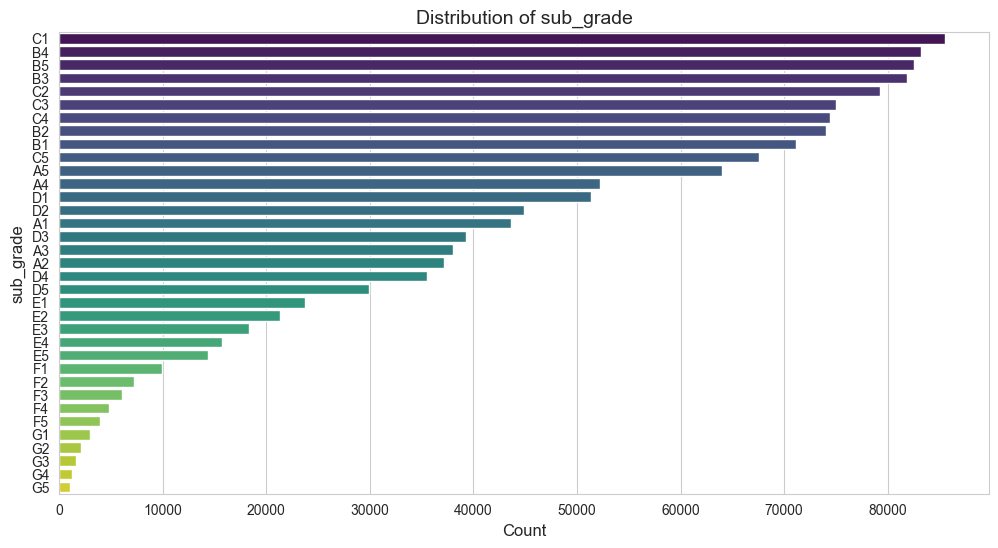

/var/folders/tc/g95c1wy50xgd_vz2h9hyjl_h0000gn/T/ipykernel_72091/1439207217.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


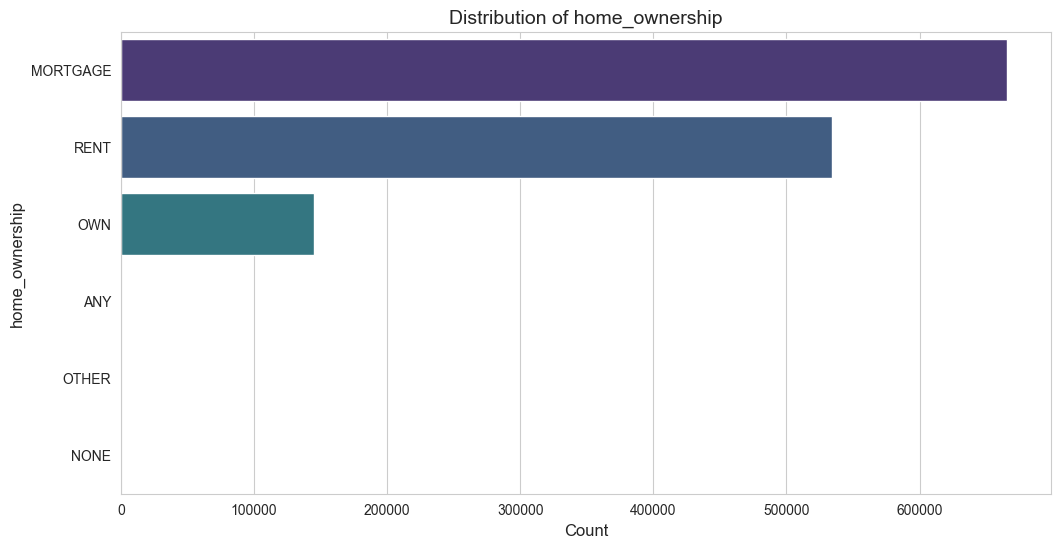

/var/folders/tc/g95c1wy50xgd_vz2h9hyjl_h0000gn/T/ipykernel_72091/1439207217.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')


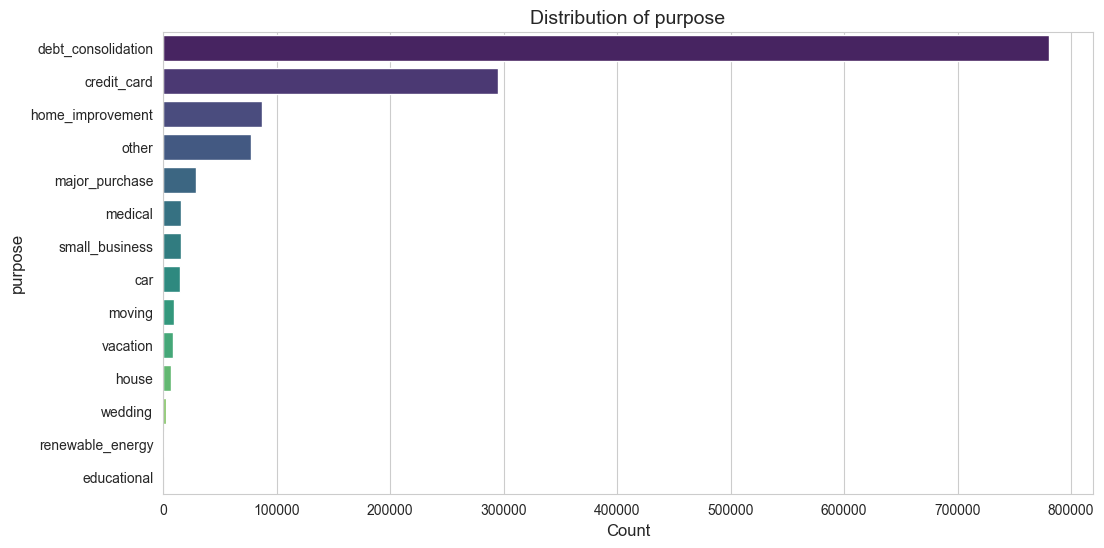

In [31]:
if not df.empty:
    # Plot distributions for key categorical features
    print("\nDistributions of Key Categorical Features")
    for col in key_categorical_features:
        plt.figure(figsize=(12, 6))
        sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')
        plt.title(f'Distribution of {col}', fontsize=14)
        plt.xlabel('Count', fontsize=12)
        plt.ylabel(col, fontsize=12)
        plt.show()

### Step 4: Bivariate Analysis

We explore relationships between independent features and our target variable, `loan_status`.

Numerical Features vs. Loan Status


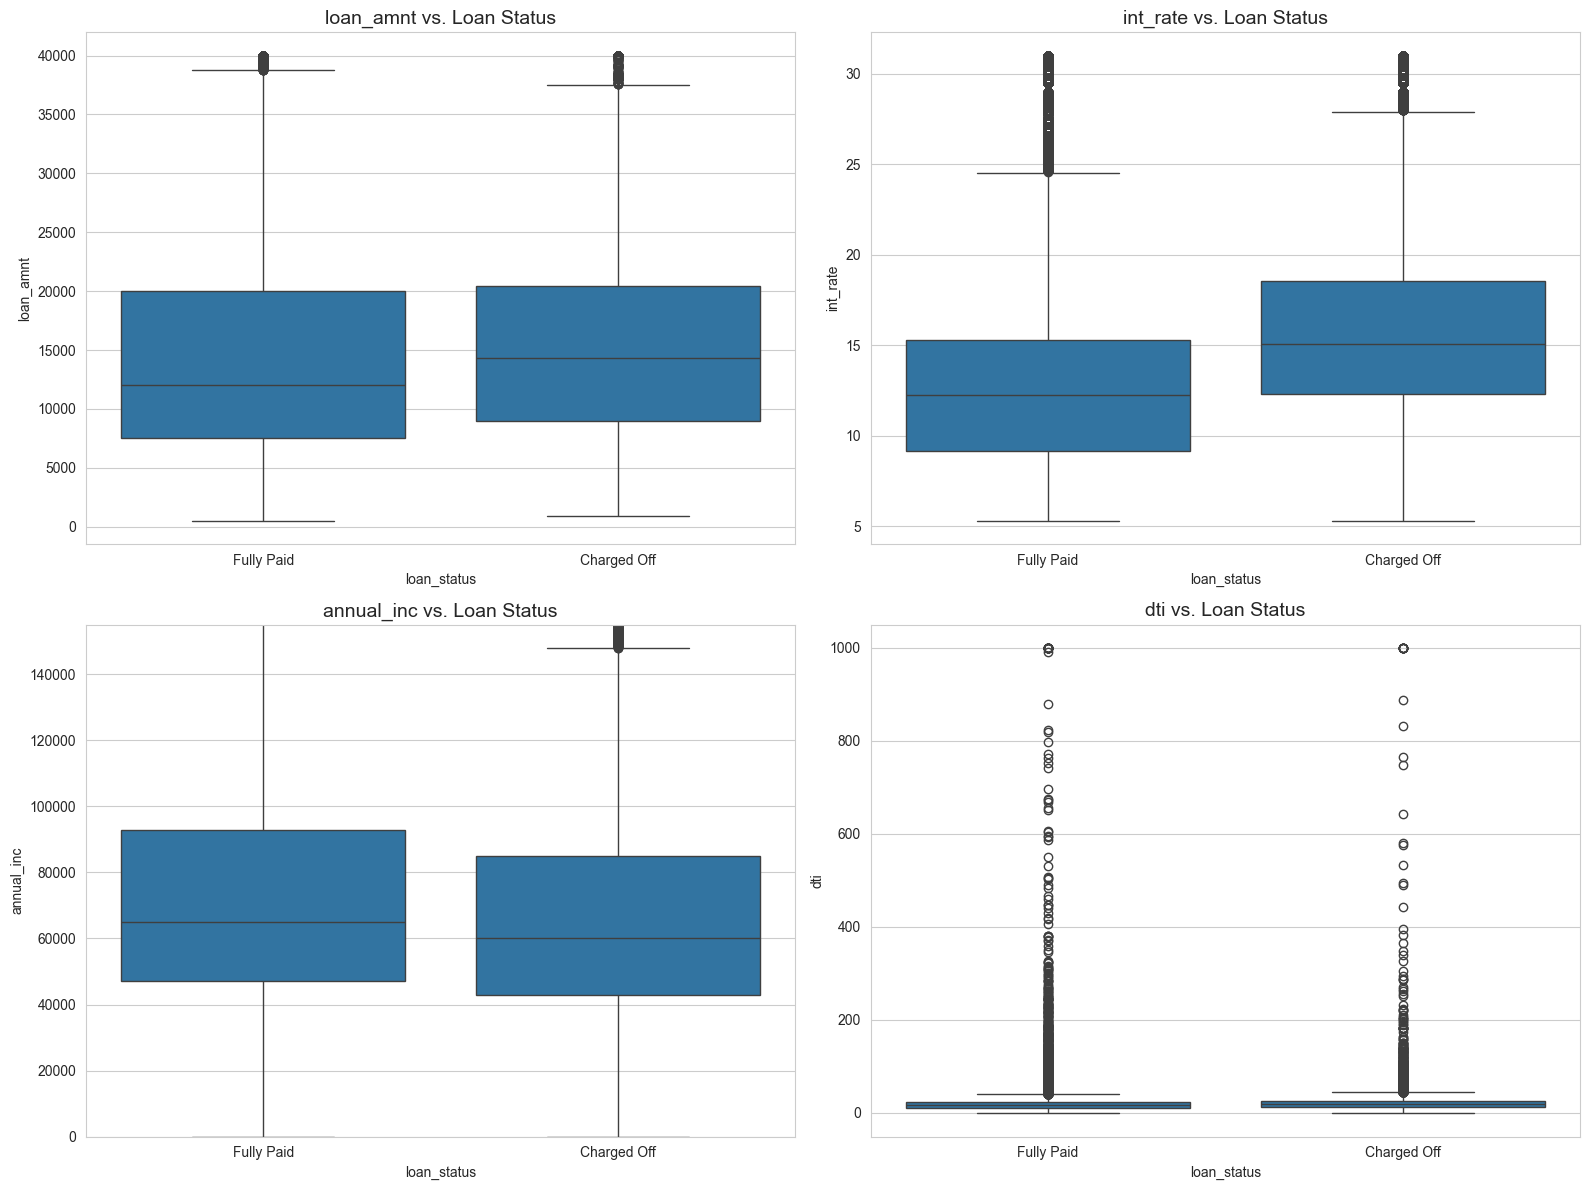

In [32]:
if not df.empty:
    # Bivariate analysis for numerical features vs. target
    print("Numerical Features vs. Loan Status")
    plt.figure(figsize=(16, 12))
    for i, col in enumerate(key_numerical_features):
        plt.subplot(2, 2, i + 1)
        sns.boxplot(x='loan_status', y=col, data=df)
        plt.title(f'{col} vs. Loan Status', fontsize=14)
        plt.xticks([0, 1], ['Fully Paid', 'Charged Off'])
        # For annual_inc, limit y-axis to see the boxplot clearly
        if col == 'annual_inc':
            plt.ylim(0, df['annual_inc'].quantile(0.95))
    plt.tight_layout()
    plt.show()


Default Rate by Categorical Features


/var/folders/tc/g95c1wy50xgd_vz2h9hyjl_h0000gn/T/ipykernel_72091/2547665688.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rate.index, y=default_rate.values, palette='plasma')


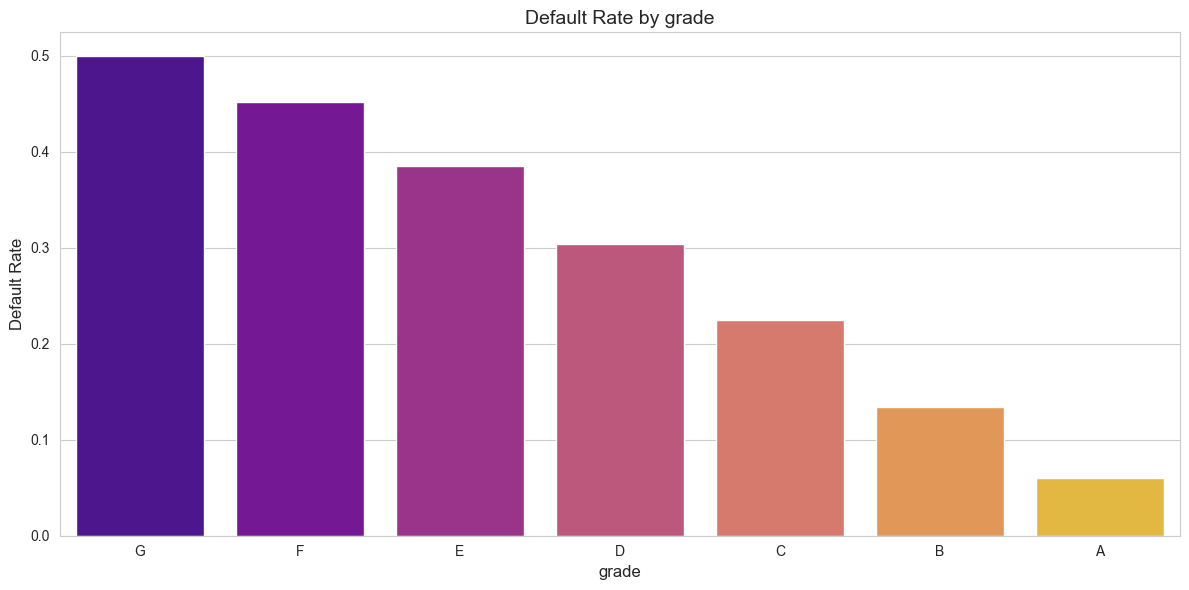

/var/folders/tc/g95c1wy50xgd_vz2h9hyjl_h0000gn/T/ipykernel_72091/2547665688.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rate.index, y=default_rate.values, palette='plasma')


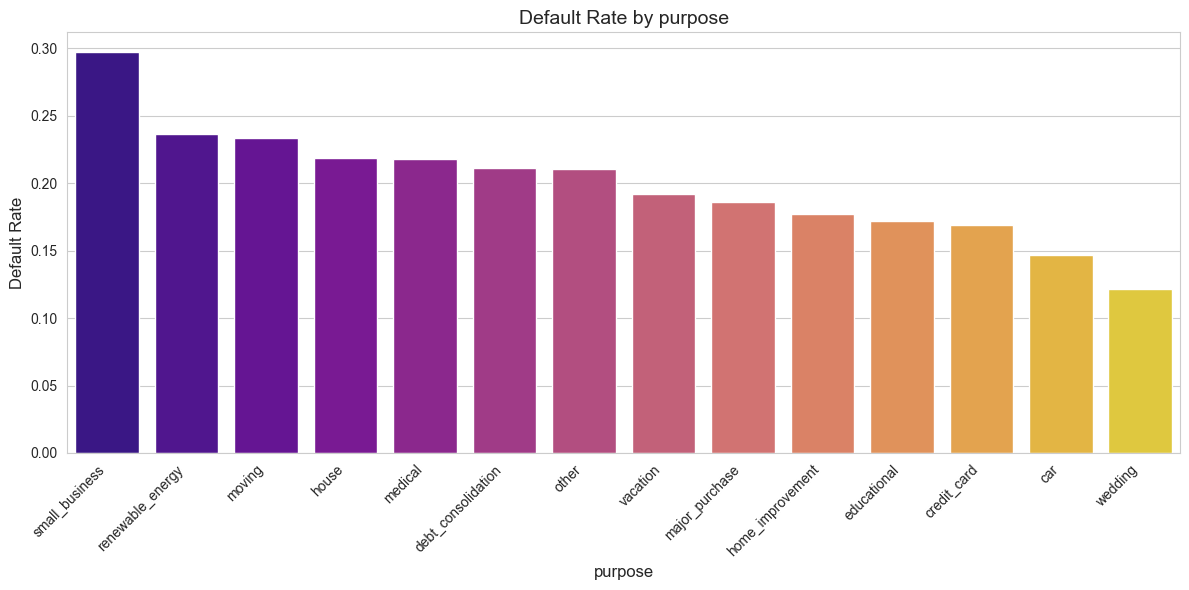

In [33]:
if not df.empty:
    # Bivariate analysis for categorical features vs. target (Default Rate)
    print("\nDefault Rate by Categorical Features")
    # We will analyze 'grade' and 'purpose'
    for col in ['grade', 'purpose']:
        plt.figure(figsize=(12, 6))
        # Calculate default rate
        default_rate = df.groupby(col)['loan_status'].mean().sort_values(ascending=False)
        sns.barplot(x=default_rate.index, y=default_rate.values, palette='plasma')
        plt.title(f'Default Rate by {col}', fontsize=14)
        plt.ylabel('Default Rate', fontsize=12)
        plt.xlabel(col, fontsize=12)
        if col == 'purpose':
            plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()


Correlation Matrix of Key Numerical Features


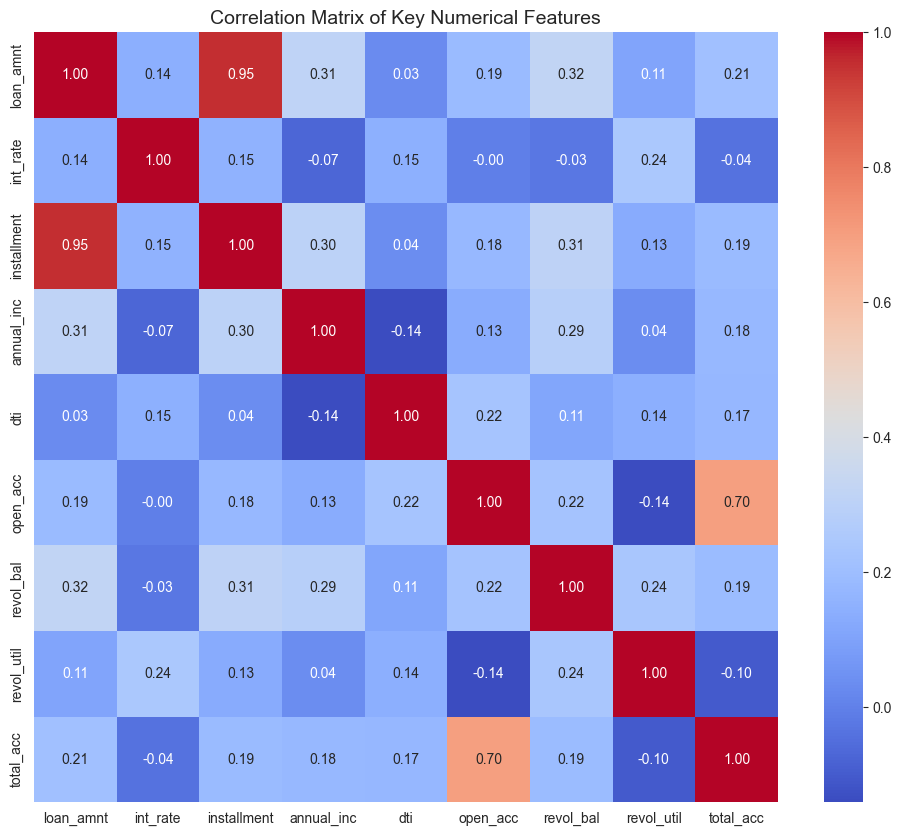

In [34]:
# Create a correlation matrix for key numerical features
if not df.empty:
    print("\nCorrelation Matrix of Key Numerical Features")
    numerical_corr_cols = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc']
    
    # Ensure all columns exist before trying to create the matrix
    existing_cols = [col for col in numerical_corr_cols if col in df.columns]
    corr_matrix = df[existing_cols].corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Key Numerical Features', fontsize=14)
    plt.show()

### Step 5: Data Cleaning and Preprocessing

This is a comprehensive step to clean the data, handle missing values, transform features, and encode categorical variables for modeling.

In [40]:
# --- Step 5: Data Cleaning and Preprocessing ---
if not df.empty:
    print("Starting Data Cleaning and Preprocessing...")
    print("-" * 50)

    # --- Handling Missing Values ---
    print("Handling Missing Values...")

    # Calculate percentage of missing values
    missing_percentage = df.isnull().mean() * 100
    print("Top 20 columns with missing values:")
    print(missing_percentage.sort_values(ascending=False).head(20))
    print("-" * 50)

    # Drop columns with a very high percentage of missing values (e.g., > 40%)
    cols_to_drop = missing_percentage[missing_percentage > 40].index
    df.drop(columns=cols_to_drop, inplace=True)
    print(f"Dropped {len(cols_to_drop)} columns with >40% missing values.")
    print("-" * 50)

    # Impute remaining missing values (demonstration)
    # For a numerical column like 'dti', use the median
    if 'dti' in df.columns and df['dti'].isnull().any():
        dti_median = df['dti'].median()
        df['dti'].fillna(dti_median, inplace=True)
        print(f"Filled missing 'dti' values with median: {dti_median}")

    # For a categorical-like numerical column like 'revol_util', use the median
    if 'revol_util' in df.columns and df['revol_util'].isnull().any():
        revol_util_median = df['revol_util'].median()
        df['revol_util'].fillna(revol_util_median, inplace=True)
        print(f"Filled missing 'revol_util' values with median: {revol_util_median}")

    

Starting Data Cleaning and Preprocessing...
--------------------------------------------------
Handling Missing Values...
Top 20 columns with missing values:
mths_since_recent_inq    12.939100
num_tl_120dpd_2m          8.726688
mo_sin_old_il_acct        7.847634
emp_title                 6.376597
pct_tl_nvr_dlq            5.030885
avg_cur_bal               5.021073
mo_sin_rcnt_rev_tl_op     5.019512
mo_sin_old_rev_tl_op      5.019512
num_rev_accts             5.019512
num_actv_rev_tl           5.019438
tot_cur_bal               5.019438
num_bc_tl                 5.019438
num_il_tl                 5.019438
total_rev_hi_lim          5.019438
mo_sin_rcnt_tl            5.019438
num_rev_tl_bal_gt_0       5.019438
num_op_rev_tl             5.019438
num_tl_90g_dpd_24m        5.019438
num_tl_30dpd              5.019438
num_accts_ever_120_pd     5.019438
dtype: float64
--------------------------------------------------
Dropped 0 columns with >40% missing values.
--------------------------------

In [48]:
# --- Feature Transformation ---
if not df.empty:
    print("\nPerforming Feature Transformation...")

    # Clean and convert 'term' (e.g., ' 36 months' -> 36)
    if 'term' in df.columns:
        if df['term'].dtype == 'object':
            # If it's a string, process it
            df['term'] = df['term'].apply(lambda x: int(x.strip().split()[0]))
            print("Transformed 'term' column from string to integer.")
        else:
            # If it's already numeric, just ensure it's integer type
            df['term'] = df['term'].astype(int)
            print("'term' column is already numeric, converted to integer type.")
    # Clean and convert 'emp_length'
    # '< 1 year' -> 0, '10+ years' -> 10, 'n years' -> n
    # Fill NaNs with the mode (most common employment length)
    if 'emp_length' in df.columns:
        # Check if emp_length is already numeric
        if df['emp_length'].dtype == 'object':
            # If it's a string, process it
            df['emp_length'].fillna(df['emp_length'].mode()[0], inplace=True)
            df['emp_length'] = df['emp_length'].replace({'< 1 year': '0 years', '10+ years': '10 years'})
            df['emp_length'] = df['emp_length'].apply(lambda x: int(x.split()[0]))
            print("Transformed 'emp_length' column from string to integer and imputed missing values.")
        else:
            # If it's already numeric, just ensure it's integer type and handle any NaN values
            df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mode()[0]).astype(int)
            print("'emp_length' column is already numeric, converted to integer type and imputed missing values.")
    # Convert date columns and extract features
    # Example: 'issue_d' to months since issue
    if 'issue_d' in df.columns:
        df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y')
        latest_date = df['issue_d'].max()
        # Calculate months using year and month differences
        df['months_since_issue'] = ((latest_date.year - df['issue_d'].dt.year) * 12 + 
                                    (latest_date.month - df['issue_d'].dt.month))
        df.drop('issue_d', axis=1, inplace=True)
        print("Transformed 'issue_d' to 'months_since_issue'.")
    print("-" * 50)



Performing Feature Transformation...
'term' column is already numeric, converted to integer type.
'emp_length' column is already numeric, converted to integer type and imputed missing values.
Transformed 'issue_d' to 'months_since_issue'.
--------------------------------------------------


In [53]:
 # --- Categorical Feature Encoding ---
if not df.empty:
   print("\nEncoding Categorical Features...")

   # For demonstration, we'll encode 'home_ownership' and 'purpose'
   categorical_to_encode = ['home_ownership', 'purpose', 'verification_status', 'initial_list_status']

   # Get dummies, and drop the original columns
   df_encoded = pd.get_dummies(df, columns=categorical_to_encode, drop_first=True, dtype=int)

   print(f"Performed one-hot encoding on: {categorical_to_encode}")
   print("Original shape:", df.shape)
   print("Shape after encoding:", df_encoded.shape)
   print("\nFirst 5 rows of the processed data:")
   print(df_encoded.head())

   print("\n--- Phase 2: EDA & Preprocessing Complete ---")

   # --- Final Missing Value Check and Imputation ---
   print("\nPerforming final missing value check and imputation...")

   # Check for any remaining missing values
   remaining_missing = df_encoded.isnull().sum()
   total_missing = remaining_missing.sum()

   if total_missing > 0:
      print(f"Found {total_missing} missing values. Imputing them...")
      
      # Get numerical and categorical columns
      numerical_cols = df_encoded.select_dtypes(include=[np.number]).columns
      categorical_cols = df_encoded.select_dtypes(include=['object']).columns
      
      # Impute numerical columns with median
      for col in numerical_cols:
         if df_encoded[col].isnull().any():
               median_val = df_encoded[col].median()
               df_encoded[col].fillna(median_val, inplace=True)
               print(f"  Filled missing '{col}' values with median: {median_val}")
      
      # Impute categorical columns with mode
      for col in categorical_cols:
         if df_encoded[col].isnull().any():
               mode_val = df_encoded[col].mode()[0]
               df_encoded[col].fillna(mode_val, inplace=True)
               print(f"  Filled missing '{col}' values with mode: {mode_val}")
      
      # Verify no missing values remain
      final_missing = df_encoded.isnull().sum().sum()
      print(f"Final check - Total remaining missing values: {final_missing}")
      
      if final_missing == 0:
         print("✓ All missing values have been successfully imputed!")
      else:
         print("⚠ Warning: Some missing values still remain.")
   else:
      print("✓ No missing values found in the encoded data.")

   # --- Final Data Preparation ---
   print("\nPerforming final data preparation...")

   # Remove any remaining object columns that might cause issues
   object_cols = df_encoded.select_dtypes(include=['object']).columns
   if len(object_cols) > 0:
      print(f"Removing {len(object_cols)} object columns that might cause issues:")
      for col in object_cols:
         print(f"  - {col}")
      df_encoded = df_encoded.drop(columns=object_cols)

   # Assign the cleaned data to df_final
   df_final = df_encoded.copy()
   print(f"\nFinal data shape: {df_final.shape}")
   print(f"Final data types:\n{df_final.dtypes.value_counts()}")

   # Verify no missing values
   final_check = df_final.isnull().sum().sum()
   print(f"\nFinal missing value check: {final_check}")

   if final_check == 0:
      print("✓ Data is completely clean and ready.")
   else:
      print("✗ Data still has missing values. Please investigate.")


Encoding Categorical Features...
Performed one-hot encoding on: ['home_ownership', 'purpose', 'verification_status', 'initial_list_status']
Original shape: (1345310, 93)
Shape after encoding: (1345310, 110)

First 5 rows of the processed data:
         id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0  68407277     3600.0       3600.0           3600.0    36     13.99   
1  68355089    24700.0      24700.0          24700.0    36     11.99   
2  68341763    20000.0      20000.0          20000.0    60     10.78   
4  68476807    10400.0      10400.0          10400.0    60     22.45   
5  68426831    11950.0      11950.0          11950.0    36     13.44   

   installment grade sub_grade             emp_title  emp_length  annual_inc  \
0       123.03     C        C4               leadman          10     55000.0   
1       820.28     C        C1              Engineer          10     65000.0   
2       432.66     B        B4          truck driver          10     63000.0   
4 

/var/folders/tc/g95c1wy50xgd_vz2h9hyjl_h0000gn/T/ipykernel_72091/2312045953.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_encoded[col].fillna(median_val, inplace=True)
/var/folders/tc/g95c1wy50xgd_vz2h9hyjl_h0000gn/T/ipykernel_72091/2312045953.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

  Filled missing 'inq_last_6mths' values with median: 0.0
  Filled missing 'collections_12_mths_ex_med' values with median: 0.0
  Filled missing 'tot_coll_amt' values with median: 0.0
  Filled missing 'tot_cur_bal' values with median: 80231.0
  Filled missing 'total_rev_hi_lim' values with median: 24100.0
  Filled missing 'acc_open_past_24mths' values with median: 4.0
  Filled missing 'avg_cur_bal' values with median: 7407.0
  Filled missing 'bc_open_to_buy' values with median: 4700.0
  Filled missing 'bc_util' values with median: 63.2
  Filled missing 'chargeoff_within_12_mths' values with median: 0.0
  Filled missing 'mo_sin_old_il_acct' values with median: 129.0
  Filled missing 'mo_sin_old_rev_tl_op' values with median: 164.0


/var/folders/tc/g95c1wy50xgd_vz2h9hyjl_h0000gn/T/ipykernel_72091/2312045953.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_encoded[col].fillna(median_val, inplace=True)
/var/folders/tc/g95c1wy50xgd_vz2h9hyjl_h0000gn/T/ipykernel_72091/2312045953.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

  Filled missing 'mo_sin_rcnt_rev_tl_op' values with median: 8.0
  Filled missing 'mo_sin_rcnt_tl' values with median: 5.0
  Filled missing 'mort_acc' values with median: 1.0
  Filled missing 'mths_since_recent_bc' values with median: 13.0
  Filled missing 'mths_since_recent_inq' values with median: 5.0
  Filled missing 'num_accts_ever_120_pd' values with median: 0.0
  Filled missing 'num_actv_bc_tl' values with median: 3.0
  Filled missing 'num_actv_rev_tl' values with median: 5.0
  Filled missing 'num_bc_sats' values with median: 4.0
  Filled missing 'num_bc_tl' values with median: 7.0
  Filled missing 'num_il_tl' values with median: 7.0


/var/folders/tc/g95c1wy50xgd_vz2h9hyjl_h0000gn/T/ipykernel_72091/2312045953.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_encoded[col].fillna(median_val, inplace=True)
/var/folders/tc/g95c1wy50xgd_vz2h9hyjl_h0000gn/T/ipykernel_72091/2312045953.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

  Filled missing 'num_op_rev_tl' values with median: 7.0
  Filled missing 'num_rev_accts' values with median: 13.0
  Filled missing 'num_rev_tl_bal_gt_0' values with median: 5.0
  Filled missing 'num_sats' values with median: 11.0
  Filled missing 'num_tl_120dpd_2m' values with median: 0.0
  Filled missing 'num_tl_30dpd' values with median: 0.0
  Filled missing 'num_tl_90g_dpd_24m' values with median: 0.0
  Filled missing 'num_tl_op_past_12m' values with median: 2.0
  Filled missing 'pct_tl_nvr_dlq' values with median: 98.0
  Filled missing 'percent_bc_gt_75' values with median: 42.9
  Filled missing 'pub_rec_bankruptcies' values with median: 0.0
  Filled missing 'tax_liens' values with median: 0.0
  Filled missing 'tot_hi_cred_lim' values with median: 112373.0


/var/folders/tc/g95c1wy50xgd_vz2h9hyjl_h0000gn/T/ipykernel_72091/2312045953.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_encoded[col].fillna(median_val, inplace=True)
/var/folders/tc/g95c1wy50xgd_vz2h9hyjl_h0000gn/T/ipykernel_72091/2312045953.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

  Filled missing 'total_bal_ex_mort' values with median: 37296.0
  Filled missing 'total_bc_limit' values with median: 15100.0
  Filled missing 'total_il_high_credit_limit' values with median: 31681.0


/var/folders/tc/g95c1wy50xgd_vz2h9hyjl_h0000gn/T/ipykernel_72091/2312045953.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_encoded[col].fillna(mode_val, inplace=True)


  Filled missing 'emp_title' values with mode: Teacher
  Filled missing 'title' values with mode: Debt consolidation
  Filled missing 'zip_code' values with mode: 945xx
  Filled missing 'last_pymnt_d' values with mode: Aug-2018
  Filled missing 'last_credit_pull_d' values with mode: Mar-2019
Final check - Total remaining missing values: 0
✓ All missing values have been successfully imputed!

Performing final data preparation...
Removing 16 object columns that might cause issues:
  - id
  - grade
  - sub_grade
  - emp_title
  - pymnt_plan
  - url
  - title
  - zip_code
  - addr_state
  - earliest_cr_line
  - last_pymnt_d
  - last_credit_pull_d
  - application_type
  - hardship_flag
  - disbursement_method
  - debt_settlement_flag

Final data shape: (1345310, 94)
Final data types:
float64    69
int64      24
int32       1
Name: count, dtype: int64

Final missing value check: 0
✓ Data is completely clean and ready for SMOTE!


In [55]:
# Save the clean data
output_file_parquet = 'processed_lending_club_data.parquet'
df_final.to_parquet(output_file_parquet, engine='fastparquet')
print(f"Processed data saved to {output_file_parquet}")


Processed data saved to processed_lending_club_data.parquet
